# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**.

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


# Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [3]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [4]:
print("Rows and columns:", data.shape)
print("\nMissing values:\n", data.isnull().sum())
print("\nDuplicate rows:", data.duplicated().sum())
print("\nData types:\n", data.info())

Rows and columns: (5391, 6)

Missing values:
 Rank                     0
Release_Date             0
Movie_Title              0
USD_Production_Budget    0
USD_Worldwide_Gross      0
USD_Domestic_Gross       0
dtype: int64

Duplicate rows: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB

Data types:
 None


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`.
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [5]:
for col in ['USD_Production_Budget', 'USD_Worldwide_Gross', 'USD_Domestic_Gross']:
  data[col] = data[col].astype(str).str.replace('$', '').str.replace(',', '')
  data[col] = pd.to_numeric(data[col])

display(data.head())

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type.

In [6]:
data['Release_Date'] = pd.to_datetime(data['Release_Date'])
display(data.head())
display(data.info())

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


None

### Descriptive Statistics

**Challenge**:

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [7]:
print("Average production budget:", data['USD_Production_Budget'].mean())
print("Average worldwide gross revenue:", data['USD_Worldwide_Gross'].mean())
print("Minimum worldwide revenue:", data['USD_Worldwide_Gross'].min())
print("Minimum domestic revenue:", data['USD_Domestic_Gross'].min())

budget_25_percentile = data['USD_Production_Budget'].quantile(0.25)
bottom_25_films = data[data['USD_Production_Budget'] <= budget_25_percentile]
bottom_25_profitable = bottom_25_films[bottom_25_films['USD_Worldwide_Gross'] > bottom_25_films['USD_Production_Budget']]
print("\nAre the bottom 25% of films profitable?", len(bottom_25_profitable) > 0)
print("Number of profitable films in the bottom 25%:", len(bottom_25_profitable))
print("Total number of films in the bottom 25%:", len(bottom_25_films))
print("\nHighest production budget:", data['USD_Production_Budget'].max())
print("Highest worldwide gross revenue:", data['USD_Worldwide_Gross'].max())

lowest_budget_film = data.loc[data['USD_Production_Budget'].idxmin()]
highest_budget_film = data.loc[data['USD_Production_Budget'].idxmax()]
print("\nRevenue of lowest budget film:", lowest_budget_film['USD_Worldwide_Gross'])
print("Revenue of highest budget film:", highest_budget_film['USD_Worldwide_Gross'])

Average production budget: 31113737.57837136
Average worldwide gross revenue: 88855421.96271564
Minimum worldwide revenue: 0
Minimum domestic revenue: 0

Are the bottom 25% of films profitable? True
Number of profitable films in the bottom 25%: 697
Total number of films in the bottom 25%: 1439

Highest production budget: 425000000
Highest worldwide gross revenue: 2783918982

Revenue of lowest budget film: 181041
Revenue of highest budget film: 2783918982


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [8]:
zero_domestic_gross = data[data['USD_Domestic_Gross'] == 0]
print("Number of films with $0 domestic gross:", len(zero_domestic_gross))
print("\nHighest budget films with $0 domestic gross:")
display(zero_domestic_gross.sort_values(by='USD_Production_Budget', ascending=False).head())

Number of films with $0 domestic gross: 512

Highest budget films with $0 domestic gross:


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0


\**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [9]:
zero_worldwide_gross = data[data['USD_Worldwide_Gross'] == 0]
print("Number of films with $0 worldwide gross:", len(zero_worldwide_gross))
print("\nHighest budget films with $0 worldwide gross:")
display(zero_worldwide_gross.sort_values(by='USD_Production_Budget', ascending=False).head())

Number of films with $0 worldwide gross: 357

Highest budget films with $0 worldwide gross:


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0


### Filtering on Multiple Conditions

**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States.

Hint: This time you'll have to use the `and` keyword.

In [10]:
international_releases = data.query('USD_Worldwide_Gross > 0 and USD_Domestic_Gross == 0')
display(international_releases.head())
print("\nNumber of international releases with worldwide gross but zero domestic gross:", len(international_releases))

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0



Number of international releases with worldwide gross but zero domestic gross: 155


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office?
* Create another DataFrame called data_clean that does not include these films.

In [11]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [12]:
unreleased_films = data[data['Release_Date'] > scrape_date]
print("Number of unreleased films:", len(unreleased_films))

data_clean = data[data['Release_Date'] <= scrape_date].copy()
display(data_clean.head())
print("\nNumber of films in data_clean:", len(data_clean))

Number of unreleased films: 7


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000



Number of films in data_clean: 5384


### Films that Lost Money

**Challenge**:
What is the percentage of films where the production costs exceeded the worldwide gross revenue?

In [13]:
films_lost_money = data_clean[data_clean['USD_Production_Budget'] > data_clean['USD_Worldwide_Gross']]
percentage_lost_money = (len(films_lost_money) / len(data_clean)) * 100
print(f"Percentage of films where production costs exceeded worldwide gross revenue: {percentage_lost_money:.2f}%")

Percentage of films where production costs exceeded worldwide gross revenue: 37.28%


# Seaborn for Data Viz: Bubble Charts

In [14]:
import seaborn as sns

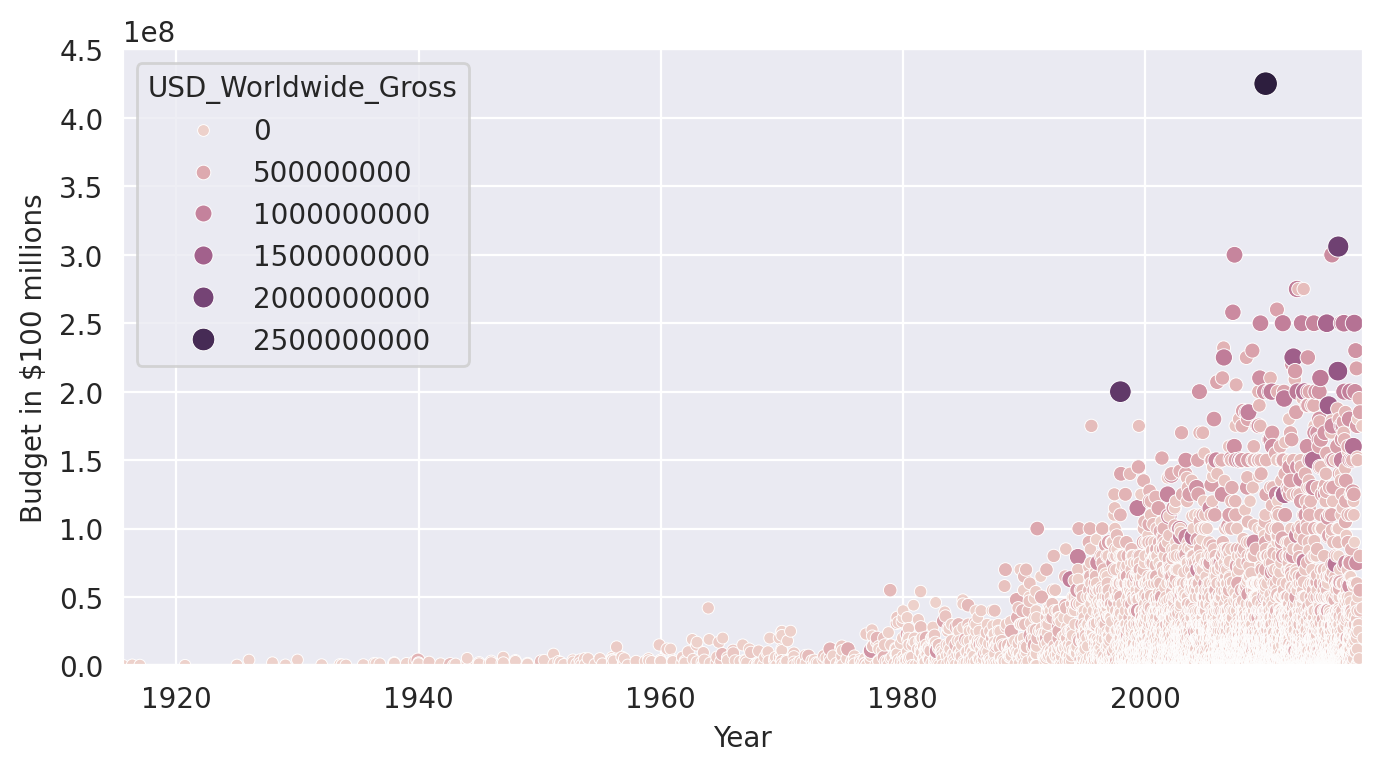

In [16]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style("darkgrid"):
    ax = sns.scatterplot(data=data_clean,
                    x='Release_Date',
                    y='USD_Production_Budget',
                    hue='USD_Worldwide_Gross',
                    size='USD_Worldwide_Gross',)

    ax.set(ylim=(0, 450000000),
           xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),
           xlabel='Year',
           ylabel='Budget in $100 millions')

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release.

<img src=https://i.imgur.com/0VEfagw.png width=650>

Here's how:
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column.
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [17]:
datetime_index = pd.DatetimeIndex(data_clean['Release_Date'])
years = datetime_index.year
decades = (years // 10) * 10
data_clean['Decade'] = decades
display(data_clean.head())

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [18]:
old_films = data_clean[data_clean['Release_Date'].dt.year <= 1969].copy()
new_films = data_clean[data_clean['Release_Date'].dt.year > 1969].copy()

print("Number of films released prior to 1970:", len(old_films))
print("\nMost expensive film made prior to 1970:")
display(old_films.sort_values(by='USD_Production_Budget', ascending=False).head(1))

Number of films released prior to 1970: 153

Most expensive film made prior to 1970:


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,1960


# Seaborn Regression Plots

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`.
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

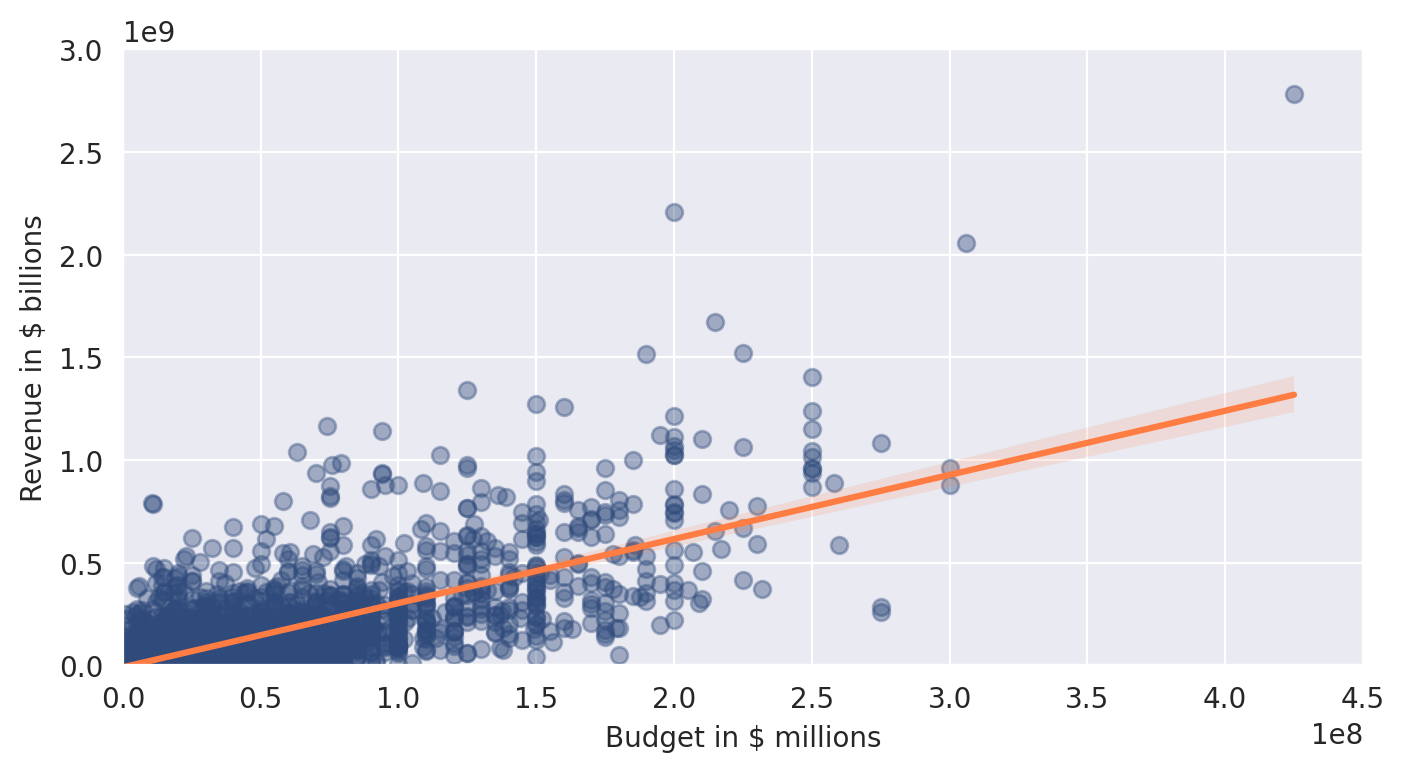

In [19]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("darkgrid"):
    ax = sns.regplot(data=new_films,
                     x='USD_Production_Budget',
                     y='USD_Worldwide_Gross',
                     color='#2f4b7c',
                     scatter_kws = {'alpha': 0.4},
                     line_kws = {'color': '#ff7c43'})

    ax.set(ylim=(0, 3000000000),
           xlim=(0, 450000000),
           ylabel='Revenue in $ billions',
           xlabel='Budget in $ millions')

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [23]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()

X_old = old_films['USD_Production_Budget'].values.reshape(-1, 1)
y_old = old_films['USD_Worldwide_Gross'].values.reshape(-1, 1)

regr.fit(X_old, y_old)

intercept_old = regr.intercept_[0]
slope_old = regr.coef_[0][0]
r_squared_old = regr.score(X_old, y_old)

print(f"Intercept for old films: {intercept_old:.2f}")
print(f"Slope for old films: {slope_old:.2f}")
print(f"R-squared for old films: {r_squared_old:.4f}")

print("\nInterpretation:")
print("The R-squared value indicates that approximately", round(r_squared_old * 100, 2), "% of the variance in movie revenue for old films is explained by the linear model.")

Intercept for old films: 22821538.64
Slope for old films: 1.65
R-squared for old films: 0.0294

Interpretation:
The R-squared value indicates that approximately 2.94 % of the variance in movie revenue for old films is explained by the linear model.


# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million?

In [24]:
predicted_revenue = intercept_old + slope_old * 350000000
print(f"The estimated global revenue for a film with a budget of $350 million is: ${predicted_revenue:,.2f}")

The estimated global revenue for a film with a budget of $350 million is: $599,521,139.04
